## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

**For this project, I want to take a look at "horseshoe theory," which is, I misunderstand it, the idea that the more political you are, the more strange, crazy, deluded, and genuinely insane you are. My goal is to find some really scary variables and see if they have a correlation with political party.**

*Variable 1: id, just to track people*

*Variable 2: partyid, to track their party*

*Variable 3: spirits, to see if they believe in ghosts (1991)*

*Variable 4: idu30, to see if they have taken hard drugs with needles (2000-2022)*

*Variable 5: ractch15, to see if they think racists should teach 15 year olds (1985)*

*Variable 6: comporn, to see if they think you should have life in jail for downloading porn at work (2000)*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

variables_to_load = ['id', 'partyid', 'spirits', 'idu30', 'ractch15', 'comporn']
df = pd.read_stata('/content/gss7222_r4.dta', columns=variables_to_load)

print(df.head())

<ipython-input-2-26aad1a8ce54>:7: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('/content/gss7222_r4.dta', columns=variables_to_load)


   id                             partyid spirits idu30 ractch15 comporn
0   1      independent, close to democrat     NaN   NaN      NaN     NaN
1   2            not very strong democrat     NaN   NaN      NaN     NaN
2   3  independent (neither, no response)     NaN   NaN      NaN     NaN
3   4            not very strong democrat     NaN   NaN      NaN     NaN
4   5                     strong democrat     NaN   NaN      NaN     NaN


In [3]:
# I only want people that are on the political spectrum for this, so I'm gonna just keep those:
valid_responses = [
    'strong democrat',
    'not very strong democrat',
    'independent, close to democrat',
    'independent (neither, no response)',
    'independent, close to republican',
    'not very strong republican',
    'strong republican'
]
df_filtered = df[df['partyid'].isin(valid_responses)]

# For spirits, I also only want valid responses:
spirits_values = ['never in my life', 'once or twice', 'several times', 'often']
spirits_filtered = df_filtered[df_filtered['spirits'].isin(spirits_values)]

# My data for idu30:
idu30_values = [
    'within the past 30 days',
    'more than 30 days ago but within the past 12 months',
    'more than 12 months ago but within the past 3 years',
    'more than 3 years ago',
]
idu_filtered = df_filtered[df_filtered['idu30'].isin(idu30_values)]

# Data for ractch15:
ractch15_values = [
    'definitely allowed',
    'probably allowed',
    'probably not allowed',
    'definitely not allowed'
]
rac_filtered = df_filtered[df_filtered['ractch15'].isin(ractch15_values)]

# Data for comporn:
comporn_values = [
    'reprimand',
    'dismissal from the military-fired by the government',
    'one year in prison',
    '5-9 years in prison',
    '10-20 years in prison',
    'life in prison'
]

comporn_filtered = df[df['comporn'].isin(comporn_values)]

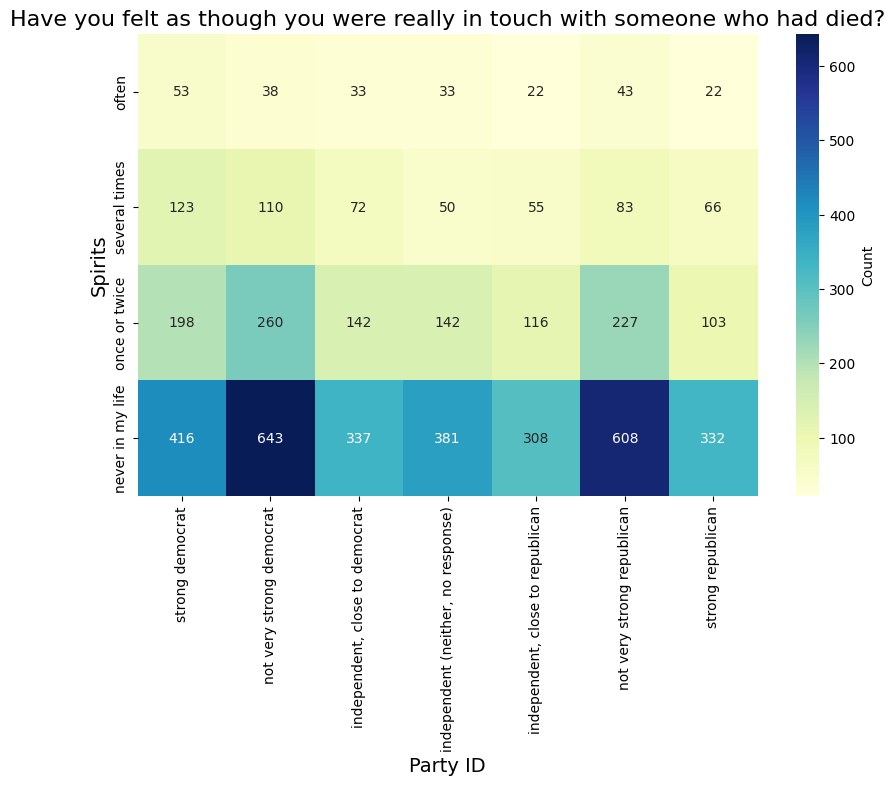

Well, this worked... alright. There's a bit of a U thing going on there. Ghosts will unite our nation.


In [4]:
# Here's the ghost one!
spirits_table = pd.crosstab(df_filtered['spirits'], df_filtered['partyid'])
plt.figure(figsize=(10, 6))
sns.heatmap(spirits_table, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Count'})
plt.gca().invert_yaxis()
plt.title('Have you felt as though you were really in touch with someone who had died?', fontsize=16)
plt.xlabel('Party ID', fontsize=14)
plt.ylabel('Spirits', fontsize=14)
plt.show()
print('Well, this worked... alright. There\'s a bit of a U thing going on there. Ghosts will unite our nation.')

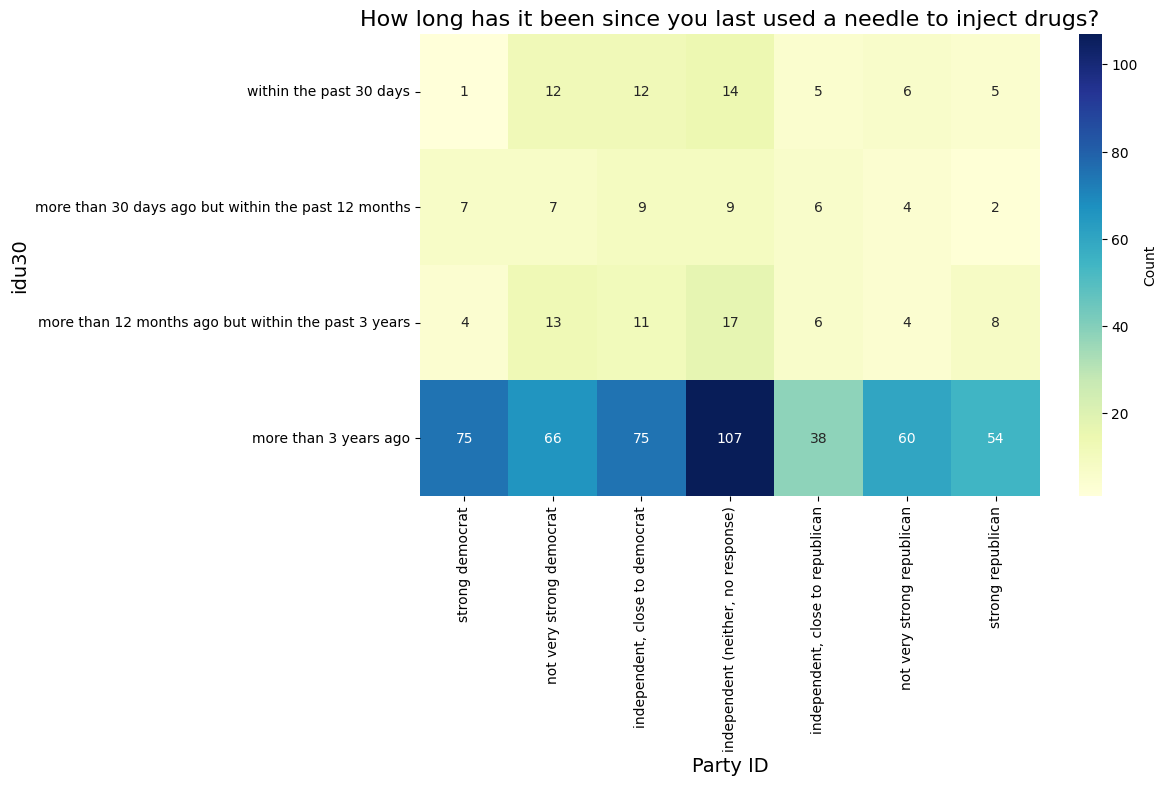

Alright, not much of a U, but it's interesting that the biggest drug users only lean a little to the left.


In [5]:
# Here's the doing hard drugs one:
idu_table = pd.crosstab(idu_filtered['idu30'], idu_filtered['partyid'])
plt.figure(figsize=(10, 6))
sns.heatmap(idu_table, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Count'})
plt.title('How long has it been since you last used a needle to inject drugs?', fontsize=16)
plt.xlabel('Party ID', fontsize=14)
plt.ylabel('idu30', fontsize=14)
plt.show()
print('Alright, not much of a U, but it\'s interesting that the biggest drug users only lean a little to the left.')

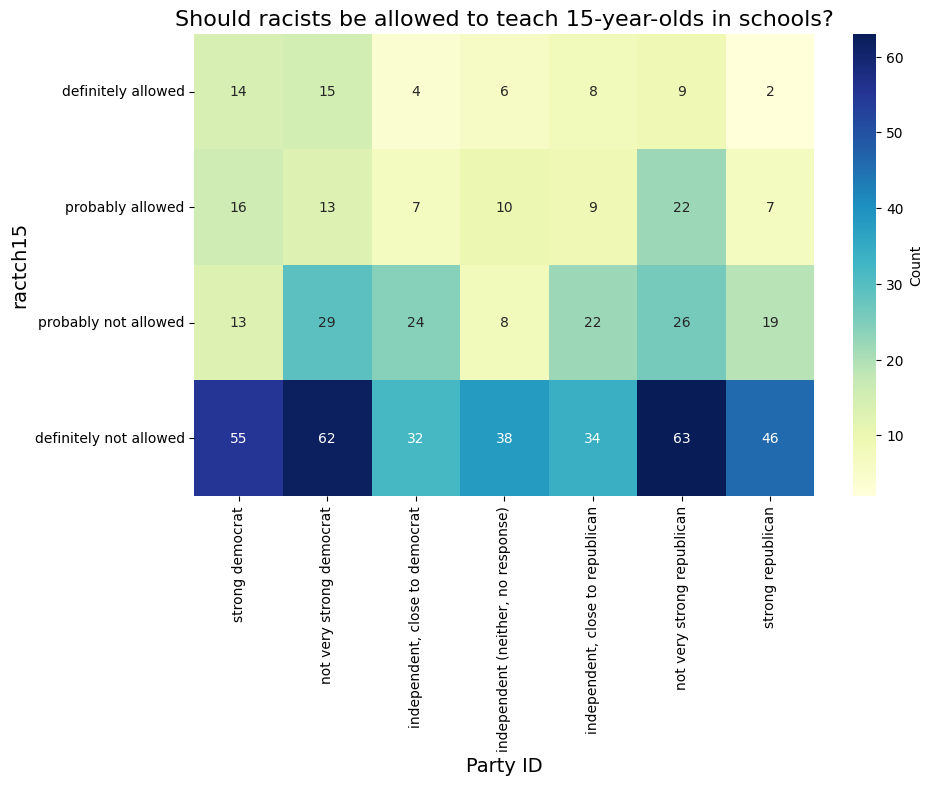

Why are strong democrats the most pro-racist teachers? Insane. A bit of a U here--horseshoe theory at work?


In [6]:
# Here's the racist teacher one:
rac_table = pd.crosstab(rac_filtered['ractch15'], rac_filtered['partyid'])
plt.figure(figsize=(10, 6))
sns.heatmap(rac_table, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Count'})
plt.title('Should racists be allowed to teach 15-year-olds in schools?', fontsize=16)
plt.xlabel('Party ID', fontsize=14)
plt.ylabel('ractch15', fontsize=14)
plt.show()
print('Why are strong democrats the most pro-racist teachers? Insane. A bit of a U here--horseshoe theory at work?')

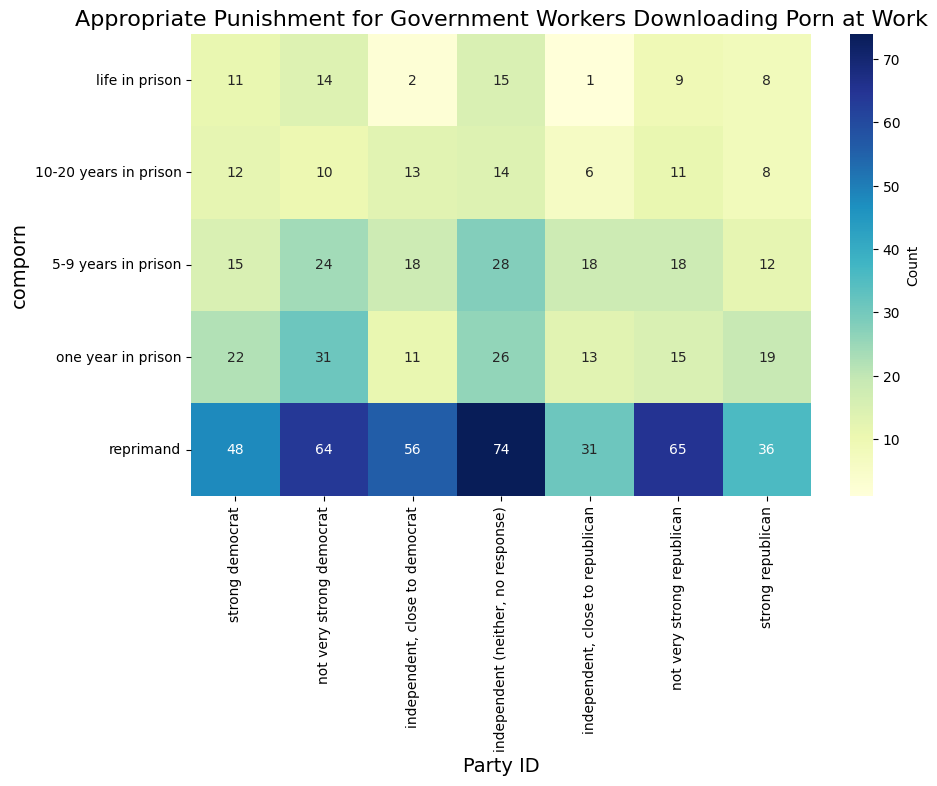

Yeah okay, this is probably an apolitical thing. I just really wanted to use this variable because it's hilarious.


In [9]:
# Here's the table for government jobs downloading porn:
comporn_filtered = comporn_filtered[comporn_filtered['partyid'] != 'other party'] # idk why 'other party' just showed up on this one, fixed
comporn_table = pd.crosstab(comporn_filtered['comporn'], comporn_filtered['partyid'])
plt.figure(figsize=(10, 6))
sns.heatmap(comporn_table, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Count'})
plt.gca().invert_yaxis()
plt.title('Appropriate Punishment for Government Workers Downloading Porn at Work', fontsize=16)
plt.xlabel('Party ID', fontsize=14)
plt.ylabel('comporn', fontsize=14)
plt.show()
print('Yeah okay, this is probably an apolitical thing. I just really wanted to use this variable because it\'s hilarious.')

Well, what have we learned? I was hoping we would get significant U-shapes that proved voters who leaned heavily in one direction had crazy takes, but I don't think the data really suggests that. Rather, perhaps we learned that people of any political party can be out of their mind. I mean, 29 self-proclaimed democrats said racist people should "definitely" be allowed to teach 15-year olds. Hundreds of people across the political spectrum truly believe they see ghosts "often!" Independent voters were the most likely to use hard drugs, and a bunch of people thought that government employees should never see the sun again if they downloaded pornography at work (again, why in the world was the GSS even asking that? Just an insane thing to ask). Anyway, if there's anything I think we should take away, it's that these people are voters, too. When you go cast a ballot, just know the person in front of you may be seeing ghosts.